# Exercice : krigeage de la fonction Ishigami

On considère la fonction 
$$
g(X_1,X_2,X_3) = \sin(X_1)+a \sin (X_2)^2 + b X_3^4 \sin(X_1)
$$
pour tout $X_1,X_2,X_3\in[-\pi,\pi]$ où $a=7$ et $b=0.1$. 

On suppose que les variables sont indépendantes et suivent la loi uniforme entre $-\pi$ et $\pi$.

L'objectif de cet exercice est de créer un métamodèle de krigeage de cette fonction. Puis nous allons réaliser l'étude de sensibilité de la fonction, en utilisant le métamodèle.

*Questions*

**Définition du modèle**
* Définir la fonction `g` associée à la fonction.

In [11]:
import openturns as ot
import numpy as np

In [ ]:
model = ot.SymbolicFunction(["X1", "X2", "X3"], ["sin(X1) + 7*sin(X2)^2 + 0.1*X3^4*sin(X1)"])

* Définir la distribution `distribution` au vecteur aléatoire en entrée.

In [18]:
X1=ot.Uniform(-np.pi, np.pi)
#X1.setDescription("X1")
X2=ot.Uniform(-np.pi, np.pi)
#X2.setDescription("X2")
X3=ot.Uniform(-np.pi, np.pi)
#X3.setDescription("X3")
mydistribution = ot.ComposedDistribution([X1, X2, X3])

**Apprentissage**
* Créer un échantillon `X_train` de taille 20 en entrée du modèle et évaluer les sorties correspondantes `Y_train`. 

In [27]:
sample_size_train = 20 
X_train = mydistribution.getSample(sample_size_train)
Y_train=model(X_train)

* Dessiner l'histogramme des sorties. 

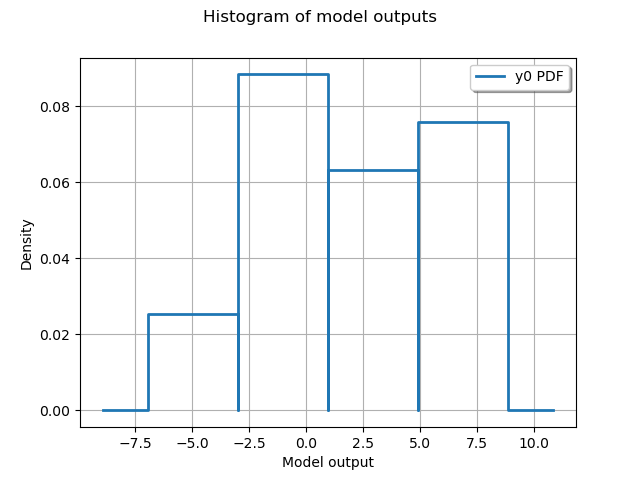

In [28]:
histo = ot.HistogramFactory().build(Y_train).drawPDF()
histo.setTitle("Histogram of model outputs")
histo.setXTitle("Model output")
histo.setYTitle("Density")
histo

* Utiliser la classe `SquaredExponential` pour définir un modèle exponentiel carré. 

In [ ]:
dimension = mydistribution.getDimension()
input_mean = X_train.computeMean()
input_std = X_train.computeStandardDeviation()

# On crée d'abord la fonction de normalisation symbolique
# f(x) = (x - mean) / std
vars = [f"x{i}" for i in range(dimension)]
formulas = [f"(x{i} - {input_mean[i]}) / {input_std[i]}" for i in range(dimension)]
normalize_function = ot.SymbolicFunction(vars, formulas)

# --- 2. Normalisation des données d'entrainement ---
# On applique simplement la fonction à l'échantillon. C'est plus sûr que les opérations manuelles.
X_train_norm = normalize_function(X_train)





* Créer un métamodèle de krigeage avec la classe `KrigingAlgorithm`. Vous utiliserez une base de type `ConstantBasisFactory`.

**Validation**
* Créer un échantillon `X_test` de taille 100 en entrée du modèle et évaluer les sorties correspondantes `Y_test`. 

* Utiliser la classe `MetaModelValidation` pour valider le métamodèle. 

* Quel est la valeur du coefficient de prédictivité ? 

* La qualité est-elle suffisante pour utiliser le métamodèle ? Quels paramètres peut-on changer ?

* Améliorez la qualité du métamodèle jusqu'à ce que la qualité soit suffisante, puis passez à la question suivante.

**Analyse de sensibilité**
* Utiliser la classe `SobolSimulationAlgorithm` pour estimer les indices de Sobol' du métamodèle. 

* Afficher les indices de Sobol'. 

* Analyser les indices de Sobol' : identifier les variables les plus influentes et les interactions.